In [23]:
import pandas as pd
import numpy as np
import os
import seaborn as sns; sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
gw36 = pd.read_csv("https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2023-24/gws/gw36.csv")

In [25]:
gw36 = gw36[["name", "position", "team", "total_points"]]
gw36 = gw36.rename(columns={"total_points":"week_points"})
sum(gw36["week_points"])

926

### Performance Analysis

In [26]:
gw36_list_classical = os.listdir("gw36_exp_classical_100")
df = pd.DataFrame()
count = 1
for data in gw36_list_classical:
    if ".csv" in data:
        #print(data)
        new_df = pd.read_csv("gw36_exp_classical_100/" + data)
        new_df = new_df.merge(gw36, on = ["name", "team", "position"], how = "left")
        #df_info = pd.DataFrame()
        #df_info["total_points"] = sum(new_df["week_points"])
        new_df["iteration"] = count
        new_df["GW"] = 36
        count += 1
        df = pd.concat([df, new_df], axis = 0).reset_index(drop=True)
        
df_grouped_classical = df.groupby(["iteration", "GW"], as_index=False)["week_points"].sum()
df_grouped_classical["type"] = "classical_100"

In [27]:
gw36_list_classical_1000 = os.listdir("gw36_exp_classical_1000")
df = pd.DataFrame()
count = 1
for data in gw36_list_classical_1000:
    if ".csv" in data:
        #print(data)
        new_df = pd.read_csv("gw36_exp_classical_1000/" + data)
        new_df = new_df.merge(gw36, on = ["name", "team", "position"], how = "left")
        #df_info = pd.DataFrame()
        #df_info["total_points"] = sum(new_df["week_points"])
        new_df["iteration"] = count
        new_df["GW"] = 36
        count += 1
        df = pd.concat([df, new_df], axis = 0).reset_index(drop=True)
        
df_grouped_classical_1000 = df.groupby(["iteration", "GW"], as_index=False)["week_points"].sum()
df_grouped_classical_1000["type"] = "classical_1000"

In [28]:
gw36_list_classical_10000 = os.listdir("gw36_exp_classical_10000")
df = pd.DataFrame()
count = 1
for data in gw36_list_classical_10000:
    if ".csv" in data:
        #print(data)
        new_df = pd.read_csv("gw36_exp_classical_10000/" + data)
        new_df = new_df.merge(gw36, on = ["name", "team", "position"], how = "left")
        #df_info = pd.DataFrame()
        #df_info["total_points"] = sum(new_df["week_points"])
        new_df["iteration"] = count
        new_df["GW"] = 36
        count += 1
        df = pd.concat([df, new_df], axis = 0).reset_index(drop=True)
        
df_grouped_classical_10000 = df.groupby(["iteration", "GW"], as_index=False)["week_points"].sum()
df_grouped_classical_10000["type"] = "classical_10000"

In [29]:
gw36_list_quantum = os.listdir("gw36_exp_quantum")
df = pd.DataFrame()
count = 1
for data in gw36_list_quantum:
    if ".csv" in data:
        #print(data)
        new_df = pd.read_csv("gw36_exp_quantum/" + data)
        new_df = new_df.merge(gw36, on = ["name", "team", "position"], how = "left")
        #df_info = pd.DataFrame()
        #df_info["total_points"] = sum(new_df["week_points"])
        new_df["iteration"] = count
        new_df["GW"] = 36
        count += 1
        df = pd.concat([df, new_df], axis = 0).reset_index(drop=True)
        
df_grouped_quantum = df.groupby(["iteration", "GW"], as_index=False)["week_points"].sum()
df_grouped_quantum["type"] = "quantum"

In [30]:
tot_df = pd.concat([df_grouped_classical, df_grouped_classical_1000, df_grouped_classical_10000, df_grouped_quantum], axis = 0).reset_index(drop=True)

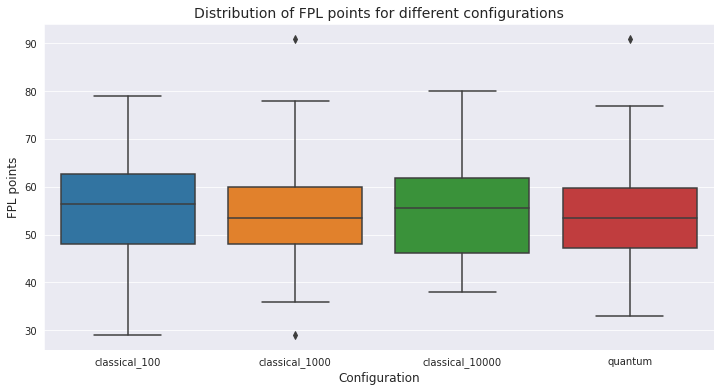

In [31]:
plt.figure(figsize=(12,6))
plt.title("Distribution of FPL points for different configurations", fontsize=14)
sns.boxplot(x = "type", y = "week_points", data = tot_df)
plt.xlabel("Configuration", fontsize=12)
plt.ylabel("FPL points", fontsize=12)
plt.savefig("results/gw36_boxplot.png")
plt.show();

In [32]:
tot_df.groupby("type")["week_points"].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
classical_100,50.0,55.26,10.996864,29.0,48.00,56.5,62.75,79.0
classical_1000,50.0,54.68,10.972024,29.0,48.00,53.5,60.00,91.0
classical_10000,50.0,55.32,10.910471,38.0,46.25,55.5,61.75,80.0
quantum,50.0,54.26,11.365558,33.0,47.25,53.5,59.75,91.0


In [33]:
tot_mean = tot_df.groupby("type", as_index=False)["week_points"].mean()
tot_mean

,type,week_points
0,classical_100,55.26
1,classical_1000,54.68
2,classical_10000,55.32
3,quantum,54.26


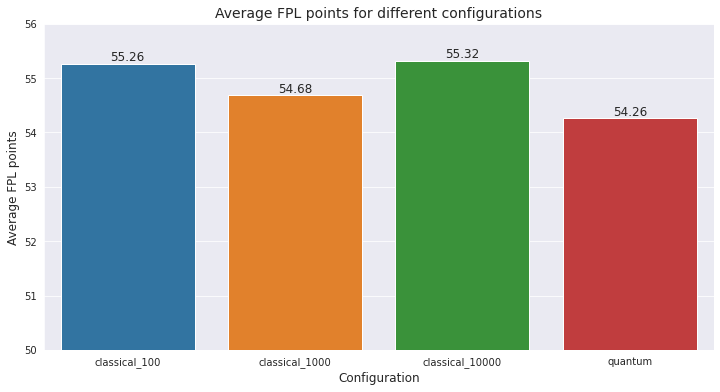

In [34]:
plt.figure(figsize=(12,6))
#sns.barplot(x = "type", y = "week_points", data = tot_mean)
plt.title("Average FPL points for different configurations", fontsize=14)
ax = sns.barplot(x = "type", y = "week_points", data = tot_mean)
ax.bar_label(ax.containers[0], labels=tot_mean['week_points'], fontsize=12)
plt.xlabel("Configuration", fontsize=12)
plt.ylabel("Average FPL points", fontsize=12)
plt.ylim(50, 56)
plt.savefig("results/gw36_barchart.png")
plt.show();

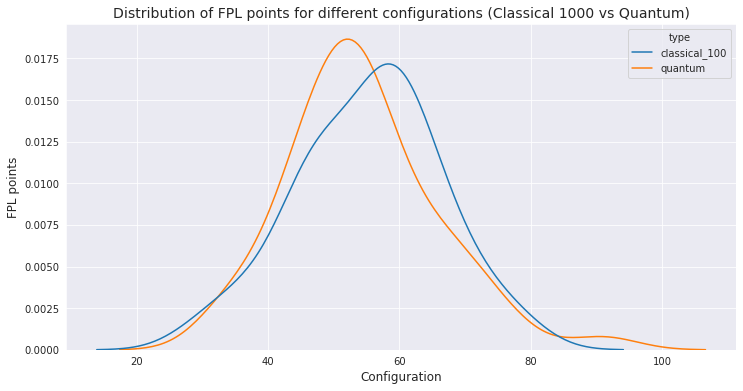

In [35]:
tot_df_use = tot_df[tot_df["type"].isin(["classical_100", "quantum"])]
plt.figure(figsize=(12,6))
plt.title("Distribution of FPL points for different configurations (Classical 1000 vs Quantum)", fontsize=14)
sns.kdeplot(x = "week_points", data = tot_df_use, hue="type")
plt.xlabel("Configuration", fontsize=12)
plt.ylabel("FPL points", fontsize=12)
plt.savefig("results/gw36_kdeplot_classical_10000_quantum.png")
plt.show();

### Runtime Analysis

In [36]:
gw36_list_classical = os.listdir("gw36_exp_classical_100")
df = pd.DataFrame()
count = 1
for data in gw36_list_classical:
    if ".csv" in data:
        #print(data)
        new_df = pd.read_csv("gw36_exp_classical_100/" + data)
        new_df = new_df.merge(gw36, on = ["name", "team", "position"], how = "left")
        #df_info = pd.DataFrame()
        #df_info["total_points"] = sum(new_df["week_points"])
        new_df["iteration"] = count
        new_df["GW"] = 36
        count += 1
        df = pd.concat([df, new_df], axis = 0).reset_index(drop=True)
        
df_grouped_classical = df.groupby(["iteration", "GW"], as_index=False)["elapsed"].mean()
df_grouped_classical["type"] = "classical_100"

In [37]:
gw36_list_classical_1000 = os.listdir("gw36_exp_classical_1000")
df = pd.DataFrame()
count = 1
for data in gw36_list_classical_1000:
    if ".csv" in data:
        #print(data)
        new_df = pd.read_csv("gw36_exp_classical_1000/" + data)
        new_df = new_df.merge(gw36, on = ["name", "team", "position"], how = "left")
        #df_info = pd.DataFrame()
        #df_info["total_points"] = sum(new_df["week_points"])
        new_df["iteration"] = count
        new_df["GW"] = 36
        count += 1
        df = pd.concat([df, new_df], axis = 0).reset_index(drop=True)
        
df_grouped_classical_1000 = df.groupby(["iteration", "GW"], as_index=False)["elapsed"].mean()
df_grouped_classical_1000["type"] = "classical_1000"

In [38]:
gw36_list_classical_10000 = os.listdir("gw36_exp_classical_10000")
df = pd.DataFrame()
count = 1
for data in gw36_list_classical_10000:
    if ".csv" in data:
        #print(data)
        new_df = pd.read_csv("gw36_exp_classical_10000/" + data)
        new_df = new_df.merge(gw36, on = ["name", "team", "position"], how = "left")
        #df_info = pd.DataFrame()
        #df_info["total_points"] = sum(new_df["week_points"])
        new_df["iteration"] = count
        new_df["GW"] = 36
        count += 1
        df = pd.concat([df, new_df], axis = 0).reset_index(drop=True)
        
df_grouped_classical_10000 = df.groupby(["iteration", "GW"], as_index=False)["elapsed"].mean()
df_grouped_classical_10000["type"] = "classical_10000"

In [39]:
gw36_list_quantum = os.listdir("gw36_exp_quantum")
df = pd.DataFrame()
count = 1
for data in gw36_list_quantum:
    if ".csv" in data:
        #print(data)
        new_df = pd.read_csv("gw36_exp_quantum/" + data)
        new_df = new_df.merge(gw36, on = ["name", "team", "position"], how = "left")
        #df_info = pd.DataFrame()
        #df_info["total_points"] = sum(new_df["week_points"])
        new_df["iteration"] = count
        new_df["GW"] = 36
        count += 1
        df = pd.concat([df, new_df], axis = 0).reset_index(drop=True)
        
df_grouped_quantum = df.groupby(["iteration", "GW"], as_index=False)["elapsed"].mean()
df_grouped_quantum["type"] = "quantum"

In [40]:
tot_df = pd.concat([df_grouped_classical, df_grouped_classical_1000, df_grouped_classical_10000, df_grouped_quantum], axis = 0).reset_index(drop=True)

In [41]:
tot_elapsed = tot_df.groupby("type", as_index=False)["elapsed"].mean().sort_values("elapsed")

In [42]:
#tot_elapsed["log_elapsed"] = np.log(tot_elapsed["elapsed"])
tot_elapsed.sort_values("elapsed")

,type,elapsed
0,classical_100,0.346458
1,classical_1000,3.287363
3,quantum,3.814430
2,classical_10000,32.890664


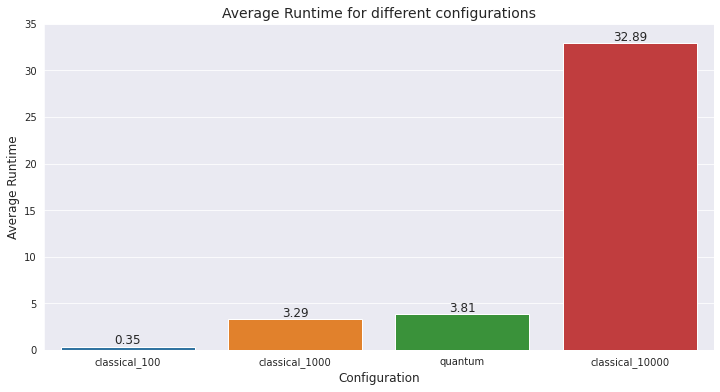

In [43]:
plt.figure(figsize=(12,6))
#sns.barplot(x = "type", y = "week_points", data = tot_mean)
plt.title("Average Runtime for different configurations", fontsize=14)
ax = sns.barplot(x = "type", y = "elapsed", data = tot_elapsed)
ax.bar_label(ax.containers[0], labels=round(tot_elapsed["elapsed"], 2), fontsize=12)
plt.xlabel("Configuration", fontsize=12)
plt.ylabel("Average Runtime", fontsize=12)
#plt.ylim(39, 45)
plt.ylim(0, 35)
plt.savefig("results/gw36_runtime_barchart.png")
plt.show();